In [1]:
# -*- coding: UTF-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import naive_bayes
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

In [2]:
#读取数据
def get_data():
	data=pd.read_excel('评论数据.xls')
	return data.loc[:,['hotelid','content','class']]

In [3]:
#建立中文停用词表 返回list格式
def get_stop_words():
	chinese_stop_words=[]
	for line in open("chinese_stop_words.txt",'r'):
		chinese_stop_words.append(line[:-1])
	return chinese_stop_words

In [4]:
#数据预处理（分词）
def get_comment_keywords_counts(comment_data,chinese_stop_words):
    seg_words_list = []
    for comment in comment_data:
        seg_word=list(jieba.cut(comment))
        result= ''
        for word in seg_word:  
            if word not in chinese_stop_words:
                if word != '\t':
                    result+=word+' '
        seg_words_list.append(result)
    return seg_words_list

In [5]:
def test_GaussianNB(x_train, x_test, y_train, y_test):
    cls = naive_bayes.GaussianNB().fit(x_train, y_train)
    predicted = cls.predict(x_test)
    y_score = cls.predict_proba(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print('GaussianNB正确率：{}'.format(cls.score(x_test, y_test)))
    print('GaussianNB的AUC：{}'.format(auc))

In [6]:
def test_MultinomialNB(x_train, x_test, y_train, y_test):
    cls = naive_bayes.MultinomialNB().fit(x_train, y_train)
    predicted = cls.predict(x_test)
    y_score = cls.predict_proba(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print('MultinomialNB正确率：{}'.format(cls.score(x_test, y_test)))
    print('MultinomialNB的AUC：{}'.format(auc))

In [7]:
def test_MultinomialNB_alpha(x_train, x_test, y_train, y_test, show=False):
    alphas = np.logspace(-2, 5, num=200)
    train_scores = []
    test_scores = []
    for alpha in alphas:
        cls = naive_bayes.MultinomialNB(alpha=alpha).fit(x_train, y_train)
        train_scores.append(cls.score(x_train, y_train))
        test_scores.append(cls.score(x_test, y_test))

    if show:
        ## 绘图:MultinomialNB 的预测性能随 alpha 参数的影响
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(alphas, train_scores, label='Training Score',color='b')
        ax.plot(alphas, test_scores, label='Testing Score', color='r')
        ax.set_xlabel(r'$\alpha$')
        ax.set_ylabel('score')
        ax.set_ylim(0, 1.0)
        ax.set_title('MultinomialNB')
        ax.set_xscale('log')
        plt.show()
    print('MultinomialNB_alpha best alpha {}'.format(alphas[test_scores.index(max(test_scores))]))
    print('MultinomialNB_alpha best test_scores {}'.format(max(test_scores)))

In [8]:
def test_BernoulliNB(x_train, x_test, y_train, y_test):
    cls = naive_bayes.BernoulliNB().fit(x_train, y_train)
    predicted = cls.predict(x_test)
    y_score = cls.predict_proba(x_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
    auc = metrics.auc(fpr, tpr)
    print('BernoulliNB正确率：{}'.format(cls.score(x_test,y_test)))
    print('BernoulliNB的AUC：{}'.format(auc))

In [9]:
def test_BernoulliNB_alpha(x_train, x_test, y_train, y_test, show=False):
    alphas = np.logspace(-2, 5, num=200)
    train_scores = []
    test_scores = []
    for alpha in alphas:
        cls = naive_bayes.BernoulliNB(alpha=alpha)
        cls.fit(x_train, y_train)
        train_scores.append(cls.score(x_train, y_train))
        test_scores.append(cls.score(x_test, y_test))

    if show:
        ## 绘图-展示BernoulliNB 的预测性能随 alpha 参数的影响
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(alphas, train_scores, label='Training Score',color='b')
        ax.plot(alphas, test_scores, label='Testing Score', color='r')
        ax.set_xlabel(r'$\alpha$')
        ax.set_ylabel('score')
        ax.set_ylim(0, 1.0)
        ax.set_title('BernoulliNB')
        ax.set_xscale('log')
        ax.legend(loc='best')
        plt.show()
    print('MultinomialNB_alpha best alpha {}'.format(alphas[test_scores.index(max(test_scores))]))    
    print('BernoulliNB_alpha best test_scores {}'.format(max(test_scores)))

In [10]:
data=get_data()
y = np.array(data['class'])
y = y.tolist()#list

In [11]:
chinese_stop_words=get_stop_words()

In [12]:
x=data['content']

In [13]:
x=get_comment_keywords_counts(x,chinese_stop_words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.724 seconds.
Prefix dict has been built succesfully.


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2018)

In [15]:
y_one_hot = label_binarize(y_test, np.arange(3))  #装换成类似二进制的编码

In [16]:
count_vect=CountVectorizer()
x_train=count_vect.fit_transform(x_train)
tfidf_transformer=TfidfTransformer().fit(x_train)
x_train=tfidf_transformer.transform(x_train)
x_test=count_vect.transform(x_test)
x_test=tfidf_transformer.transform(x_test)

In [17]:
test_GaussianNB(x_train.todense(), x_test.todense(), y_train, y_test)  # 调用 test_GaussianNB

GaussianNB正确率：0.4539363484087102
GaussianNB的AUC：0.46135484982303726


In [18]:
test_BernoulliNB(x_train, x_test, y_train, y_test)

BernoulliNB正确率：0.6045040014889261
BernoulliNB的AUC：0.4828059915974915


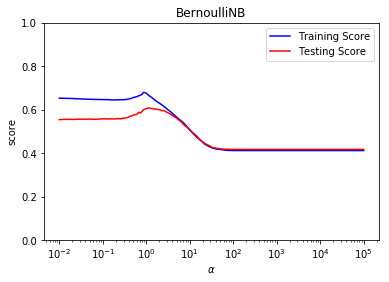

MultinomialNB_alpha best alpha 1.096985797892384
BernoulliNB_alpha best test_scores 0.6071096221849991


In [19]:
test_BernoulliNB_alpha(x_train, x_test, y_train, y_test,show = True)  # 调用 test_BernoulliNB_alpha
#蓝线为训练集分数，红线为测试集分数

In [20]:
test_MultinomialNB(x_train,x_test,y_train,y_test) # 调用 test_MultinomialNB

MultinomialNB正确率：0.6506607109622184
MultinomialNB的AUC：0.4139766713298123


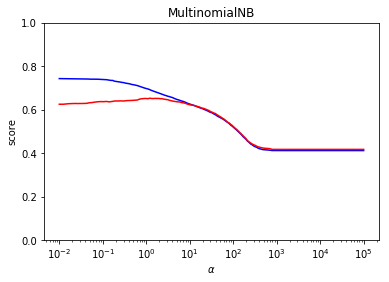

MultinomialNB_alpha best alpha 1.1895340673703196
MultinomialNB_alpha best test_scores 0.6519635213102549


In [21]:
test_MultinomialNB_alpha(x_train, x_test, y_train, y_test,show = True)  # 调用 test_MultinomialNB_alpha
#蓝线为训练集分数，红线为测试集分数

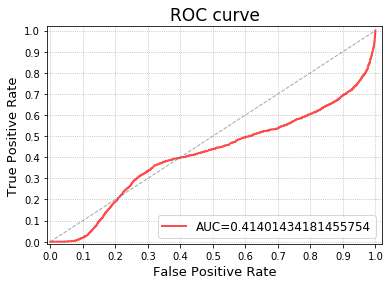

MultinomialNB正确率：0.6519635213102549


In [22]:
# auc曲线图
model1=naive_bayes.MultinomialNB(alpha=1.1895340673703196).fit(x_train, y_train)
y_score = model1.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel())
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, c = 'r', lw = 2, alpha = 0.7, label = 'AUC={}'.format(auc))
plt.plot((0, 1), (0, 1), c = '#808080', lw = 1, ls = '--', alpha = 0.7)
plt.xlim((-0.01, 1.02))
plt.ylim((-0.01, 1.02))
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=13)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title('ROC curve', fontsize=17)
plt.show()

predicted = model1.predict(x_test)
i=0
for doc,category in zip(y_test,predicted):
    if doc==category:
        i=i+1
print('MultinomialNB正确率：{}'.format(i/len(predicted)))